In [16]:
import os
from glob import glob
import pandas as pd
from barplots import barplots

In [15]:
data = []
for path in glob("cache/*/*/*/*.csv"):
    _, dataset, holdout_number, model, _ = path.split(os.sep)
    df = pd.read_csv(path, index_col=0)
    df["dataset"] = dataset
    df["holdout_number"] = holdout_number
    df["model"] = model
    data.append(df)
df = pd.concat(data).reset_index(drop=True)
df

,loss,accuracy,AUPRC,AUROC,run_type,dataset,holdout_number,model
0,0.111083,0.966392,0.902626,0.968528,training,resized_processed,0,ResNet50V2
1,0.159897,0.952783,0.825117,0.929047,validation,resized_processed,0,ResNet50V2
2,0.156544,0.954595,0.828811,0.929790,test,resized_processed,0,ResNet50V2
3,0.005043,0.999491,0.999861,0.999994,training,resized_processed,0,ResNet50V2
4,0.036801,0.988676,0.911234,0.972895,validation,resized_processed,0,ResNet50V2
...,...,...,...,...,...,...,...,...
157,0.069563,0.984503,0.859146,0.931577,validation,processed,5,ResNet50V2
158,0.052339,0.987518,0.897107,0.974258,test,processed,5,ResNet50V2
159,0.008333,0.997674,0.774072,0.969691,training,processed,5,ResNet50V2
160,0.013549,0.997186,0.569092,0.915947,validation,processed,5,ResNet50V2


Rendering barplots:   0%|          | 0/4 [00:00<?, ?it/s]

((<Figure size 1000x480 with 1 Axes>,
  <Figure size 1000x480 with 1 Axes>,
  <Figure size 1000x480 with 1 Axes>,
  <Figure size 1000x480 with 1 Axes>),
 (array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5d94d8d90>],
        dtype=object),
  array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5d95c0f10>],
        dtype=object),
  array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5b8e22fd0>],
        dtype=object),
  array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5d96d68d0>],
        dtype=object)))

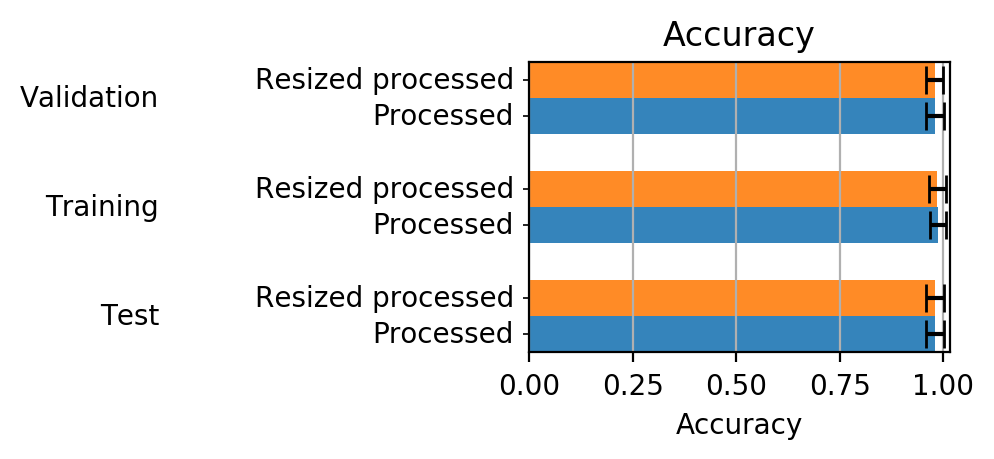

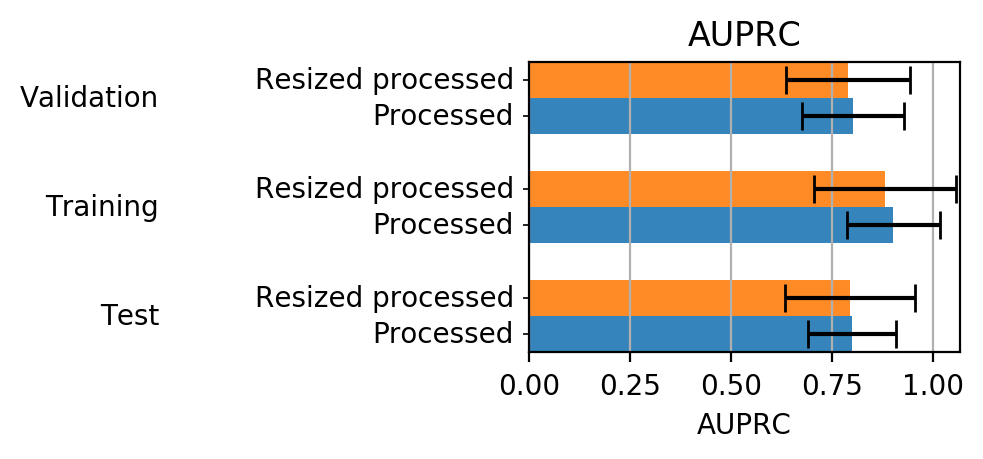

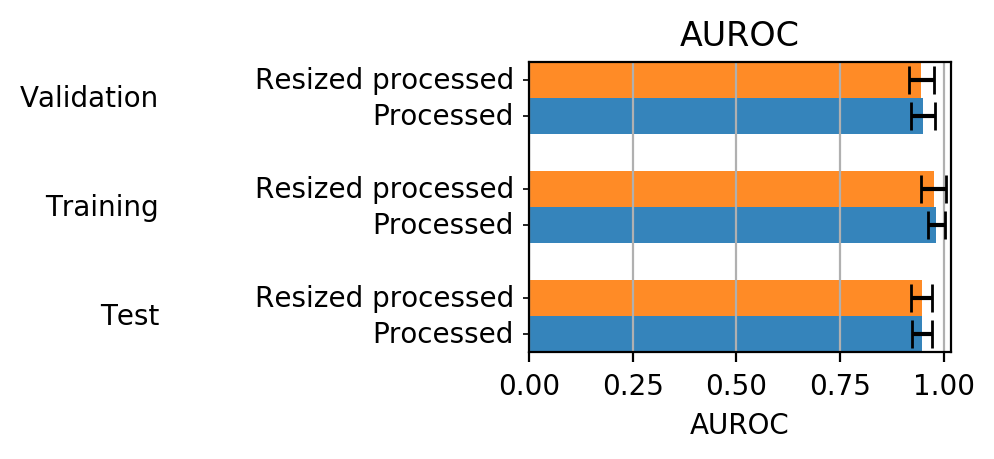

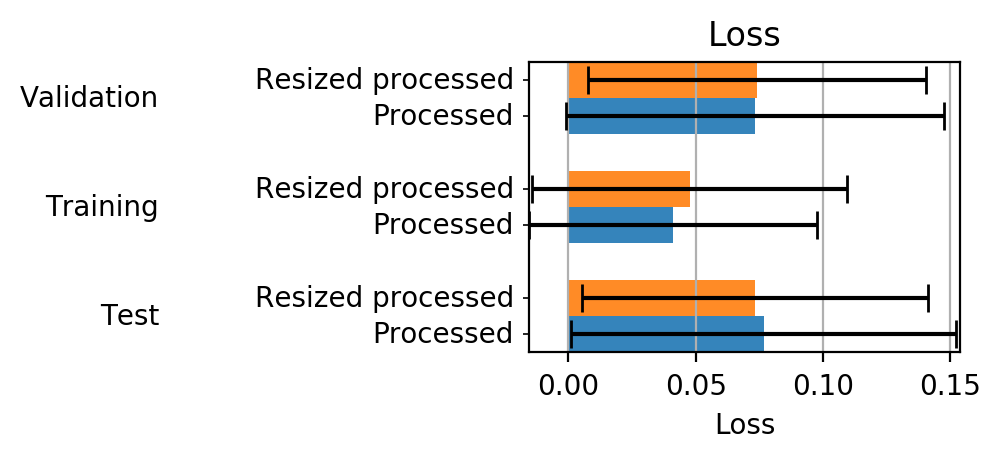

In [22]:
barplots(
    df,
    groupby=["run_type", "dataset"],
    orientation="horizontal",
    height=5,
    show_legend=False
)